In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [125]:
# Import data set
df = pd.read_csv('../data/artDataset_preprocessed.csv')

# Let's transform the data set into a numpy array
data_array = df.to_numpy()

# Predictors
X = data_array[:,1:]

# Target
y = data_array[:,0]

## **1. Ridge Regression**

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error

In [127]:
# 1. Define consistent CV strategy. The same CV strategy should be used for all models.
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=17)

# 2. Define pipeline and parameter grid
# Define a range of parameter values to test
alpha_values = np.logspace(-1, 5, 100)

# Define the parameter grid --> We need a dictionary as an input for the parameters
param_lambda_values = {'ridge__alpha' : alpha_values}

# Pipeline for GridsearchCV
ridge_pipeline = Pipeline([
    ("var_thresh", VarianceThreshold()),  # Remove low-variance features
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge())             # Apply Ridge Regression
])


# 3. GridSearchCV (find the best parameter) with established CV strategy
ridge_cv = GridSearchCV(estimator=ridge_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=cv_strategy)
ridge_cv.fit(X, y)      # it uses the normalized data stablished in the pipeline

# Best parameter
best_alpha_ridge = ridge_cv.best_params_['ridge__alpha']

# Generalization error (in terms of RMSE) from GridSearchCV
best_rmse_ridge = np.sqrt(-ridge_cv.best_score_)

# Print results
print(f"Best regularization parameter: {best_alpha:.4f} \nRMSE: {best_rmse_ridge:.4f}")

# 4. Evaluate best model separately using cross_val_score with same CV strategy
best_ridge_model = ridge_cv.best_estimator_

# it's the same as:
best_ridge_model = Pipeline([
    ("var_thresh", VarianceThreshold()),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=best_alpha_ridge))
])

# Obtain the scores for each fold and the averages CV generalization errors
mse_folds = -cross_val_score(best_ridge_model, X, y, cv=cv_strategy, scoring='neg_mean_squared_error')
mean_mse_ridge = np.mean(mse_folds)

rmse_folds = np.sqrt(mse_folds)
mean_rmse_ridge = np.sqrt(mean_mse_ridge)

# Define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Cross-validated MAE (remember: scores are negative, so we negate)
mae_scores = -cross_val_score(best_ridge_model, X, y, cv=cv_strategy, scoring=mae_scorer)
mean_mae_ridge = np.mean(mae_scores)

# Print results
print("\nRidge Regression Cross-Validation Results:\n")

print(f"RMSE for each fold: {np.round(rmse_folds, 2)}")
print(f"Mean RMSE: {mean_rmse_ridge:.4f} (±{rmse_folds.std():.4f})\n")

print(f"MSE for each fold: {np.round(mse_folds, 2)}")
print(f"Mean MSE: {mean_mse_ridge:.4f} (±{mse_folds.std():.4f})\n")

print(f"MAE for each fold: {np.round(mae_scores, 2)}")
print(f"Mean MAE: {mean_mae_ridge:.4f} (±{mae_scores.std():.4f})")

Best regularization parameter: 1149.7570 
RMSE: 12035.7685

Ridge Regression Cross-Validation Results:

RMSE for each fold: [13086.44 14275.66 10258.71  8687.68 12982.  ]
Mean RMSE: 12035.7685 (±2060.3967)

MSE for each fold: [1.71255041e+08 2.03794326e+08 1.05241220e+08 7.54757228e+07
 1.68532312e+08]
Mean MSE: 144859724.2590 (±47146912.9330)

MAE for each fold: [5939.65 5259.94 5333.4  5531.25 5378.25]
Mean MAE: 5488.4984 (±242.4110)


## **2. Lasso Regression**

In [128]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import make_scorer, mean_absolute_error

In [129]:
# 1. Define consistent CV strategy. The same CV strategy should be used for all models.
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=17)

# 2. Define pipeline and parameter grid
# Define a range of parameter values to test
alpha_values = np.logspace(2, 4, 100)

# Define the parameter grid --> We need a dictionary as an input for the parameters
param_alpha_values = {'lasso__alpha' : alpha_values}

# Pipeline for GridsearchCV
lasso_pipeline = Pipeline([
    ("var_thresh", VarianceThreshold()),  # Remove low-variance features
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', Lasso(max_iter=100000))             # Apply Lasso Regression
])


# 3. GridSearchCV (find the best parameter) with established CV strategy
lasso_cv = GridSearchCV(estimator=lasso_pipeline, param_grid=param_alpha_values, scoring='neg_mean_squared_error', cv=cv_strategy)
lasso_cv.fit(X, y)      # it uses the normalized data stablished in the pipeline

# Best parameter
best_alpha_lasso = lasso_cv.best_params_['lasso__alpha']

# Generalization error (in terms of RMSE) from GridSearchCV
best_rmse_lasso = np.sqrt(-lasso_cv.best_score_)

# Print results
print(f"Best regularization parameter: {best_alpha:.4f} \nRMSE: {best_rmse_lasso:.4f}")

# 4. Evaluate best model separately using cross_val_score with same CV strategy
best_lasso_model = lasso_cv.best_estimator_

# it's the same as:
best_lasso_model = Pipeline([
    ("var_thresh", VarianceThreshold()),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=best_alpha_lasso, max_iter=100000))
])

# Obtain the scores for each fold and the averages CV generalization errors
mse_folds = -cross_val_score(best_lasso_model, X, y, cv=cv_strategy, scoring='neg_mean_squared_error')
mean_mse_lasso = np.mean(mse_folds)

rmse_folds = np.sqrt(mse_folds)
mean_rmse_lasso = np.sqrt(mean_mse_lasso)

# Define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Cross-validated MAE (remember: scores are negative, so we negate)
mae_scores = -cross_val_score(best_lasso_model, X, y, cv=cv_strategy, scoring=mae_scorer)
mean_mae_lasso = np.mean(mae_scores)

# Print results
print("\nLasso Regression Cross-Validation Results:\n")

print(f"RMSE for each fold: {np.round(rmse_folds, 2)}")
print(f"Mean RMSE: {mean_rmse_lasso:.4f} (±{rmse_folds.std():.4f})\n")

print(f"MSE for each fold: {np.round(mse_folds, 2)}")
print(f"Mean MSE: {mean_mse_lasso:.4f} (±{mse_folds.std():.4f})\n")

print(f"MAE for each fold: {np.round(mae_scores, 2)}")
print(f"Mean MAE: {mean_mae_lasso:.4f} (±{mae_scores.std():.4f})")

Best regularization parameter: 1149.7570 
RMSE: 12291.5969

Lasso Regression Cross-Validation Results:

RMSE for each fold: [13426.09 14493.61 10471.49  9296.51 13000.58]
Mean RMSE: 12291.5969 (±1939.2480)

MSE for each fold: [1.80259917e+08 2.10064653e+08 1.09652088e+08 8.64251346e+07
 1.69014978e+08]
Mean MSE: 151083354.2763 (±45932219.0420)

MAE for each fold: [6416.72 5913.82 5579.34 5922.72 5726.42]
Mean MAE: 5911.8046 (±282.8287)


There are 3 non-zero coefficients out of 58.


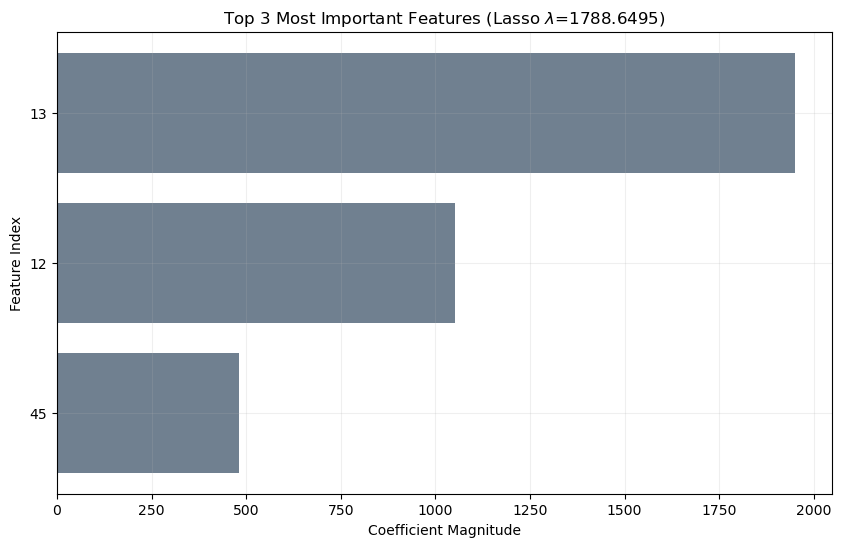

In [130]:
# 1. Fit the final model on the entire dataset
best_lasso_model.fit(X, y)

# 2. Access the Lasso step in the pipeline
lasso_regressor = best_lasso_model.named_steps['lasso']

# 3. Get coefficients and intercept
coefficients = lasso_regressor.coef_
intercept = lasso_regressor.intercept_

print(f'There are {sum(coefficients != 0)} non-zero coefficients out of {len(coefficients)}.')


feature_indices = np.arange(X.shape[1])

# Get coefficients and sort by absolute value
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_coefs = coefficients[sorted_idx]
sorted_features = feature_indices[sorted_idx]

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(sum(coefficients != 0)), sorted_coefs[:sum(coefficients != 0)], align='center',color='slategray')
plt.yticks(range(sum(coefficients != 0)), sorted_features[:sum(coefficients != 0)])
plt.title(rf'Top {sum(coefficients != 0)} Most Important Features (Lasso $\lambda$={best_alpha_lasso:.4f})')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Index')
plt.grid(alpha=0.2)
plt.gca().invert_yaxis()  # Highest coefficient at top
plt.show()

## **3. Elastic Net**

In [131]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import make_scorer, mean_absolute_error

In [132]:
# 1. Define consistent CV strategy. The same CV strategy should be used for all models.
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=17)

# 2. Define pipeline and parameter grid
# Define a range of parameter values to test
alpha_values = np.logspace(0, 3, 100)
l1_ratio_values = np.linspace(0.05, 0.95, 19)

# Define the parameter grid --> We need a dictionary as an input for the parameters
param_grid = {
    'elasticnet__alpha': alpha_values,
    'elasticnet__l1_ratio': l1_ratio_values  # The mix ratio between Lasso and Ridge
}

# Pipeline for GridsearchCV
elasticnet_pipeline = Pipeline([
    ("var_thresh", VarianceThreshold()),  # Remove low-variance features
    ('scaler', StandardScaler()),  # Standardize features
    ('elasticnet', ElasticNet(max_iter=100000))             # Apply EN Regression
])


# 3. GridSearchCV (find the best parameter) with established CV strategy
elasticnet_cv = GridSearchCV(estimator=elasticnet_pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv_strategy, n_jobs=-1)
elasticnet_cv.fit(X, y)      # it uses the normalized data stablished in the pipeline

# Best parameters
best_alpha_elasticnet = elasticnet_cv.best_params_['elasticnet__alpha']
best_l1_ratio_elasticnet = elasticnet_cv.best_params_['elasticnet__l1_ratio']

# Generalization error (in terms of RMSE) from GridSearchCV
best_rmse_elasticnet = np.sqrt(-elasticnet_cv.best_score_)

# Print results
print(f"Best alpha: {best_alpha_elasticnet:.4f}\nBest l1_ratio: {best_l1_ratio_elasticnet:.4f} \nRMSE: {best_rmse_elasticnet:.4f}")

# 4. Evaluate best model separately using cross_val_score with same CV strategy
best_elasticnet_model = elasticnet_cv.best_estimator_

# it's the same as:
best_elasticnet_model = Pipeline([
    ("var_thresh", VarianceThreshold()),
    ("scaler", StandardScaler()),
    ("elasticnet", ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet, max_iter=100000))
])

# Obtain the scores for each fold and the averages CV generalization errors
mse_folds = -cross_val_score(best_elasticnet_model, X, y, cv=cv_strategy, scoring='neg_mean_squared_error')
mean_mse_elasticnet = np.mean(mse_folds)

rmse_folds = np.sqrt(mse_folds)
mean_rmse_elasticnet = np.sqrt(mean_mse_elasticnet)

# Define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Cross-validated MAE (remember: scores are negative, so we negate)
mae_scores = -cross_val_score(best_elasticnet_model, X, y, cv=cv_strategy, scoring=mae_scorer)
mean_mae_elasticnet = np.mean(mae_scores)

# Print results
print("\nElasticNet Regression Cross-Validation Results:\n")

print(f"RMSE for each fold: {np.round(rmse_folds, 2)}")
print(f"Mean RMSE: {mean_rmse_elasticnet:.4f} (±{rmse_folds.std():.4f})\n")

print(f"MSE for each fold: {np.round(mse_folds, 2)}")
print(f"Mean MSE: {mean_mse_elasticnet:.4f} (±{mse_folds.std():.4f})\n")

print(f"MAE for each fold: {np.round(mae_scores, 2)}")
print(f"Mean MAE: {mean_mae_elasticnet:.4f} (±{mae_scores.std():.4f})")

Best alpha: 37.6494
Best l1_ratio: 0.9500 
RMSE: 12034.8411

ElasticNet Regression Cross-Validation Results:

RMSE for each fold: [13088.14 14273.83 10260.26  8707.24 12963.66]
Mean RMSE: 12034.8411 (±2051.9270)

MSE for each fold: [1.71299398e+08 2.03742180e+08 1.05273006e+08 7.58159681e+07
 1.68056454e+08]
Mean MSE: 144837401.2791 (±46986028.2523)

MAE for each fold: [5943.6  5266.87 5338.55 5534.19 5368.29]
Mean MAE: 5490.2987 (±242.9999)


There are 56 non-zero coefficients out of 58.


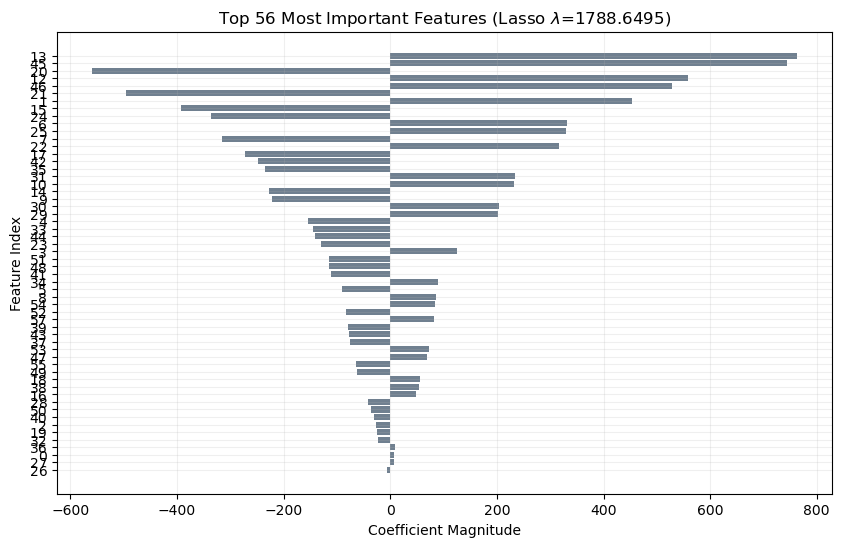

In [133]:
# 1. Fit the final model on the entire dataset
best_elasticnet_model.fit(X, y)

# 2. Access the Lasso step in the pipeline
elasticnet_regressor = best_elasticnet_model.named_steps['elasticnet']

# 3. Get coefficients and intercept
coefficients = elasticnet_regressor.coef_
intercept = elasticnet_regressor.intercept_

print(f'There are {sum(coefficients != 0)} non-zero coefficients out of {len(coefficients)}.')


feature_indices = np.arange(X.shape[1])

# Get coefficients and sort by absolute value
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_coefs = coefficients[sorted_idx]
sorted_features = feature_indices[sorted_idx]

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(sum(coefficients != 0)), sorted_coefs[:sum(coefficients != 0)], align='center',color='slategray')
plt.yticks(range(sum(coefficients != 0)), sorted_features[:sum(coefficients != 0)])
plt.title(rf'Top {sum(coefficients != 0)} Most Important Features (Lasso $\lambda$={best_alpha_lasso:.4f})')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Index')
plt.grid(alpha=0.2)
plt.gca().invert_yaxis()  # Highest coefficient at top
plt.show()

## **Comparison**

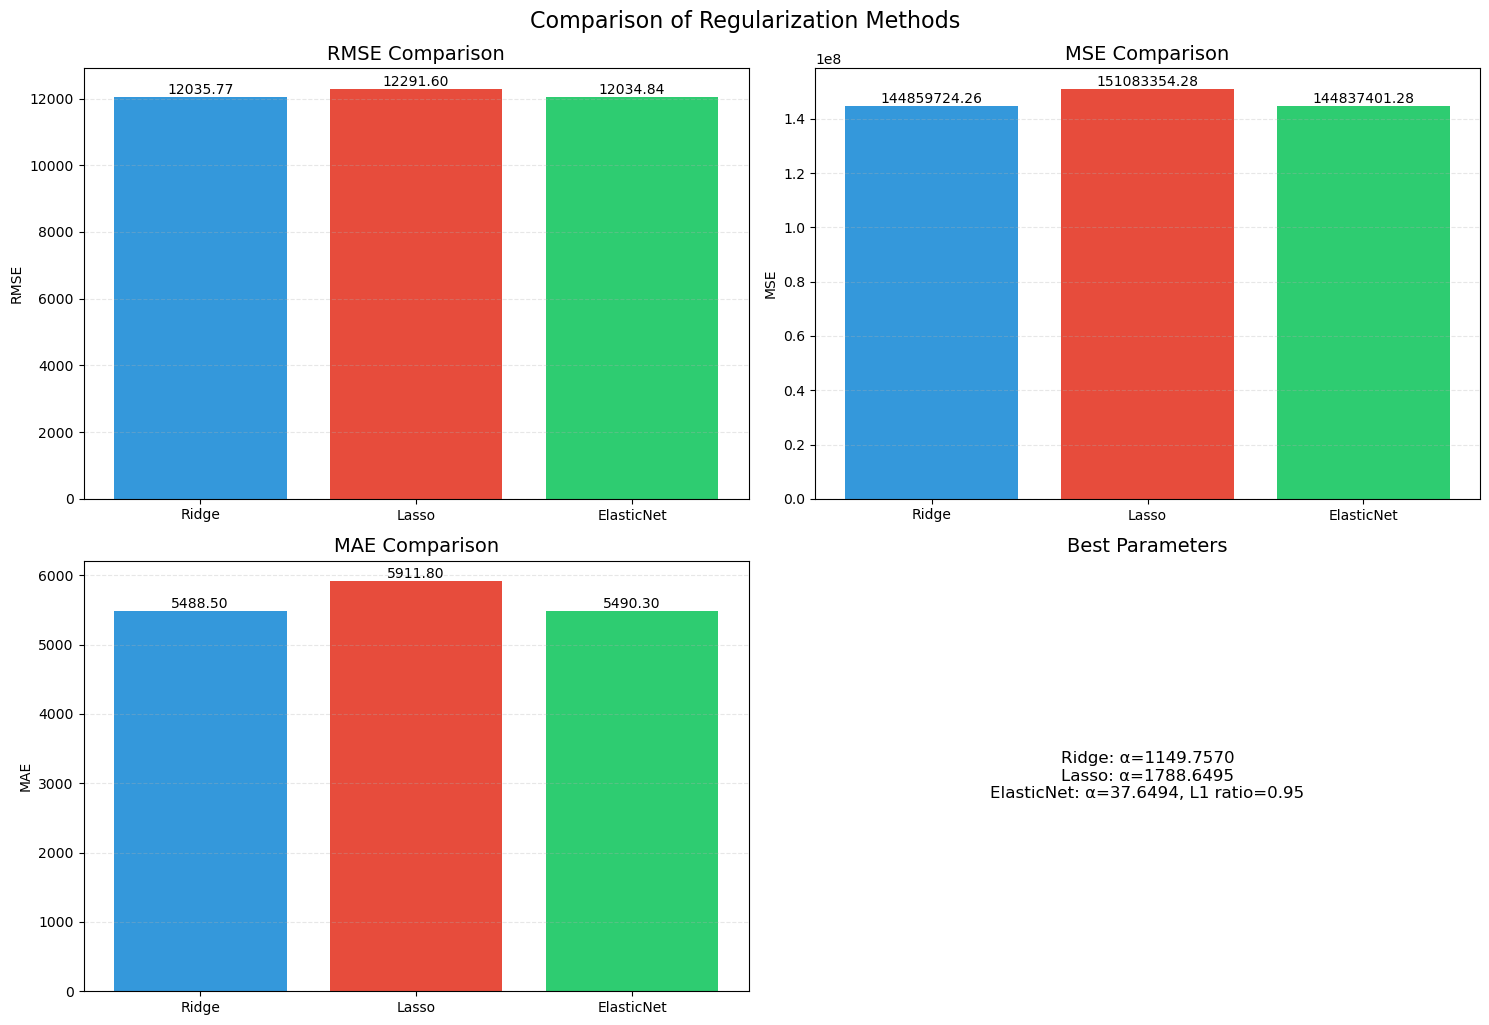

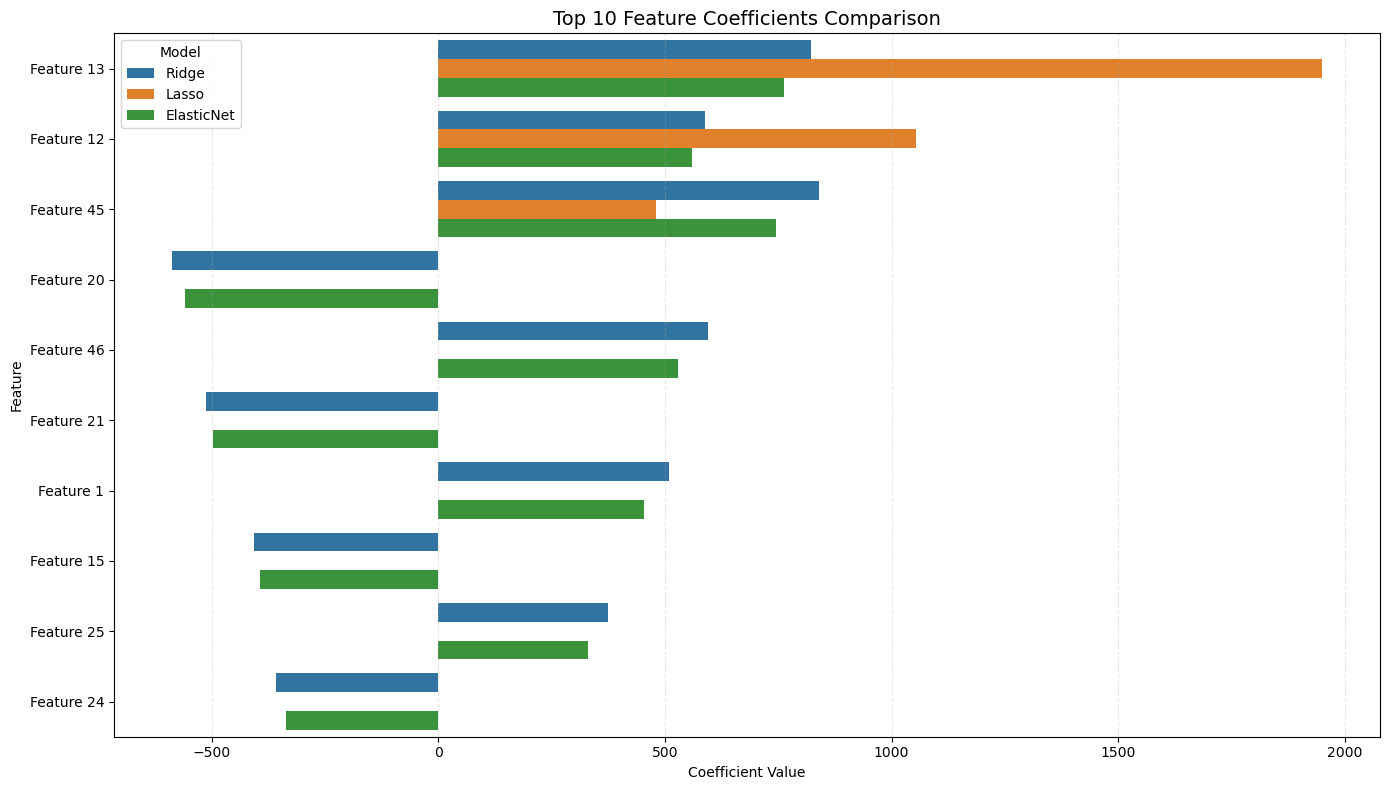

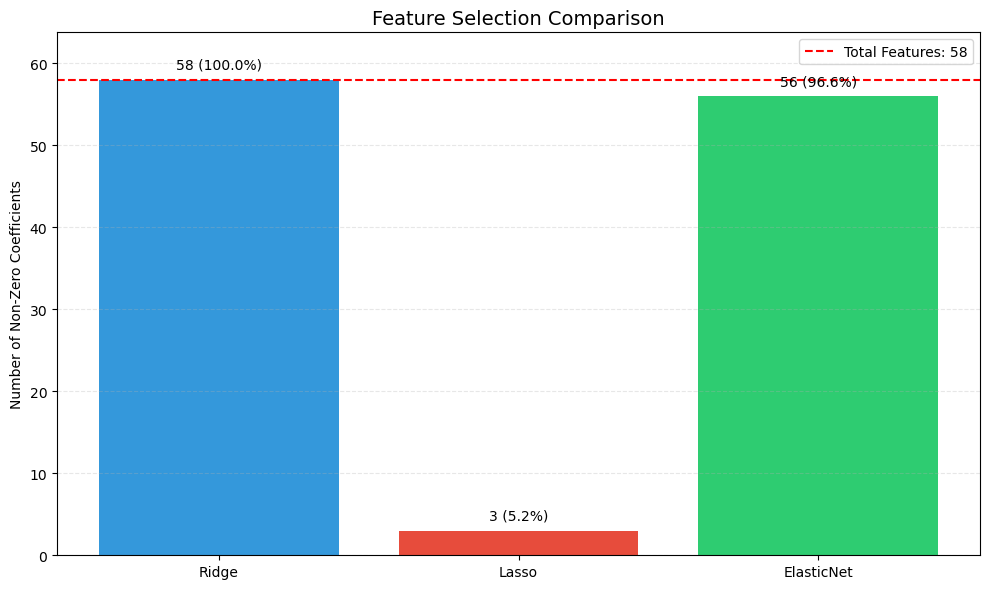

Model Comparison Summary:


,Model,Best Parameters,RMSE,MSE,MAE,Non-Zero Features,Feature Sparsity (%)
0,Ridge,α=1149.7570,12035.768536,1.448597e+08,5488.498442,58,0.000000
1,Lasso,α=1788.6495,12291.596897,1.510834e+08,5911.804647,3,94.827586
2,ElasticNet,"α=37.6494, L1 ratio=0.95",12034.841141,1.448374e+08,5490.298722,56,3.448276


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a comparison DataFrame of the three models
models = ['Ridge', 'Lasso', 'ElasticNet']

# Collect the best parameters
best_params = {
    'Ridge': f'α={best_alpha_ridge:.4f}',
    'Lasso': f'α={best_alpha_lasso:.4f}',
    'ElasticNet': f'α={best_alpha_elasticnet:.4f}, L1 ratio={best_l1_ratio_elasticnet:.2f}'
}

# Collect error metrics
rmse_values = {
    'Ridge': mean_rmse_ridge,
    'Lasso': mean_rmse_lasso,
    'ElasticNet': mean_rmse
}

mae_values = {
    'Ridge': mean_mae_ridge,
    'Lasso': mean_mae_lasso,
    'ElasticNet': mean_mae
}

mse_values = {
    'Ridge': mean_mse_ridge,
    'Lasso': mean_mse_lasso,
    'ElasticNet': mean_mse
}

# 1. Bar chart comparison of error metrics
plt.figure(figsize=(15, 10))

# RMSE Comparison
plt.subplot(2, 2, 1)
bars = plt.bar(models, [rmse_values[model] for model in models], 
        color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('RMSE Comparison', fontsize=14)
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

# MSE Comparison
plt.subplot(2, 2, 2)
bars = plt.bar(models, [mse_values[model] for model in models], 
        color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('MSE Comparison', fontsize=14)
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

# MAE Comparison
plt.subplot(2, 2, 3)
bars = plt.bar(models, [mae_values[model] for model in models], 
        color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('MAE Comparison', fontsize=14)
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

# Best Parameters
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Best Parameters', fontsize=14)
param_text = '\n'.join([f"{model}: {best_params[model]}" for model in models])
plt.text(0.5, 0.5, param_text, ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.suptitle('Comparison of Regularization Methods', fontsize=16, y=1.02)
plt.show()

# 2. Feature importance comparison
# Get the best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_elasticnet = elasticnet_cv.best_estimator_

# Extract feature names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

# Extract coefficients
ridge_coef = best_ridge.named_steps['ridge'].coef_
lasso_coef = best_lasso.named_steps['lasso'].coef_
elasticnet_coef = best_elasticnet.named_steps['elasticnet'].coef_

# Create DataFrame for plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef,
    'ElasticNet': elasticnet_coef
})

# Calculate absolute values for sorting
coef_df['Abs_Ridge'] = np.abs(coef_df['Ridge'])
coef_df['Abs_Lasso'] = np.abs(coef_df['Lasso'])
coef_df['Abs_ElasticNet'] = np.abs(coef_df['ElasticNet'])

# Get top features based on average importance
coef_df['Avg_Importance'] = (coef_df['Abs_Ridge'] + coef_df['Abs_Lasso'] + coef_df['Abs_ElasticNet']) / 3
top_features = coef_df.sort_values('Avg_Importance', ascending=False).head(10)['Feature'].tolist()

# Filter for top features
plot_df = coef_df[coef_df['Feature'].isin(top_features)].sort_values('Avg_Importance', ascending=False)

# Reshape for seaborn
plot_df_melted = pd.melt(plot_df, id_vars=['Feature'], 
                         value_vars=['Ridge', 'Lasso', 'ElasticNet'],
                         var_name='Model', value_name='Coefficient')

# Plot feature importance comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=plot_df_melted)
plt.title('Top 10 Feature Coefficients Comparison', fontsize=14)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# 3. Sparsity comparison (number of non-zero coefficients)
non_zero_ridge = np.sum(np.abs(ridge_coef) > 1e-6)
non_zero_lasso = np.sum(np.abs(lasso_coef) > 1e-6)
non_zero_elasticnet = np.sum(np.abs(elasticnet_coef) > 1e-6)

total_features = len(feature_names)

plt.figure(figsize=(10, 6))
bars = plt.bar(models, [non_zero_ridge, non_zero_lasso, non_zero_elasticnet], 
        color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Feature Selection Comparison', fontsize=14)
plt.ylabel('Number of Non-Zero Coefficients')
plt.ylim(0, total_features * 1.1)  # Add some space at the top

# Add value labels and percentages on top of bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_features) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.axhline(y=total_features, color='red', linestyle='--', 
            label=f'Total Features: {total_features}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Summary table
summary_data = {
    'Model': models,
    'Best Parameters': [best_params[model] for model in models],
    'RMSE': [rmse_values[model] for model in models],
    'MSE': [mse_values[model] for model in models],
    'MAE': [mae_values[model] for model in models],
    'Non-Zero Features': [non_zero_ridge, non_zero_lasso, non_zero_elasticnet],
    'Feature Sparsity (%)': [
        (1 - non_zero_ridge/total_features) * 100,
        (1 - non_zero_lasso/total_features) * 100,
        (1 - non_zero_elasticnet/total_features) * 100
    ]
}

summary_df = pd.DataFrame(summary_data)
print("Model Comparison Summary:")
display(summary_df)